# **Identifying differentially expressed genes involved in Tetralogy of Fallot**

Tetralogy of Fallot (TOF) is a congenital heart defect that affects the structure of the heart and its ability to pump blood to the body (1). TOF is one of the most common forms of congenital heart disease, accounting for around 10% of all cases (2). The condition is characterized by a combination of four abnormalities in the heart: a ventricular septal defect (VSD), narrowing of the pulmonary artery (pulmonary stenosis), an enlarged aorta that overrides the VSD, and right ventricular hypertrophy (thickening of the muscle in the right ventricle) (3). These abnormalities can cause oxygen-poor blood to be pumped to the body, resulting in symptoms such as cyanosis (bluish discoloration of the skin), shortness of breath, and fatigue. While TOF is a serious condition, advances in medical treatment have greatly improved the long-term outlook for those born with the defect (4).

Locating differentially expressed genes can provide valuable insights into the underlying biological mechanisms of Tetralogy of Fallot (TOF) and help identify potential therapeutic targets. Differentially expressed genes are genes that are expressed at different levels between affected individuals and healthy controls. These genes can be identified using techniques such as microarray analysis or RNA sequencing. 

In today's assignment we will use a dataset from the EMBL-EBI's Expression Atlas to locate differentially expressed genes for TOF (5, 6). You will visualize your results with a volcano plot. Let's get started!

**First run the following code to import some libraries that we will need.**

In [5]:
# importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler


#### **Exercise 3.1**

First, we have to load the data file called harmonized_counts.csv 
It contains the following information:
- Experimental design
  - `Run`: ID for every separate patient.
  - `disease`: gives information if the patient was healthy (`normal`) or affected (`Tetralogy of Fallot`).
  - `Gene ID`: Separate identifier for every separate gene.
  - `Gene Name`: depicting all measured genes

The csv format is a "comma separated file" in wich columns are separated with a comma, if we open this with a text editor we would be capable of see it, but pandas has implemented the function already in order to load this data format and display it directly as a table.


Let's look a t the documentation of What does the function `pd.read_csv()`


In [27]:
df = pd.read_csv('harmonized_counts.csv',index_col=0)
df

,Gene ID,Gene Name,Run,geneCount,disease
0,ENSG00000000003,TSPAN6,SRR448087,36.700158,normal
1,ENSG00000000005,TNMD,SRR448087,0.000000,normal
2,ENSG00000000419,DPM1,SRR448087,160.687179,normal
3,ENSG00000000457,SCYL3,SRR448087,32.732573,normal
4,ENSG00000000460,C1orf112,SRR448087,6.943273,normal
...,...,...,...,...,...
1703310,ENSG00000285990,NBEAP6,SRR448116,0.000000,Tetralogy of Fallot
1703311,ENSG00000285991,NaN,SRR448116,NaN,Tetralogy of Fallot
1703312,ENSG00000285992,NaN,SRR448116,NaN,Tetralogy of Fallot
1703313,ENSG00000285993,NaN,SRR448116,NaN,Tetralogy of Fallot


#### **Exercise 3.3**

Principal component Analysis.

Now that we loaded the data we can perform a PCA on the samples and then visualize the data, this will help us to understand if there is a difference in the 2 conditions based on RNA expression. In fact we expect that, based on expression profiling, the 2 samples will clusterize together, in this way we will know that the 2 groups (disease and non-disease) differs.

In order to do this we will need to:
- Groupby for Sample
- Run PCA 
- Plot the results 

In [7]:
# Groupby
df_samples = df.groupby('Run').agg({'geneCount':list,
                                    'disease':'first'})



 Try to think: what is describing my samples? What are the so called features? How many **dimensions** do we have? Can I plot data as they are? 

In [8]:
# With this feature we will extract the numbers that reflects the expression of each gene (features) related to every sample, we will end up with a matrix (table) of 
# $n_samples x n_features$

rna_expression_multidimensional = np.stack(df_samples.geneCount.values) 

# Fill missing values of our features with 0
rna_expression_multidimensional[np.isnan(rna_expression_multidimensional)] = 0

rna_expression_multidimensional

array([[ 36.70015807,   0.        , 160.68717859, ...,   0.        ,
          0.        ,   0.        ],
       [ 42.65153506,   0.        ,  97.20582408, ...,   0.        ,
          0.        ,   0.        ],
       [ 31.74067725,   0.        ,  80.34358929, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [130.47010481,   2.12146512, 240.78629099, ...,   0.        ,
          0.        ,   0.        ],
       [ 66.82615124,   0.        , 107.1339885 , ...,   0.        ,
          0.        ,   0.        ],
       [106.07325594,   0.        , 191.99259326, ...,   0.        ,
          0.        ,   0.        ]])

In [19]:
std = StandardScaler()

rna_expression_multidimensional_norm = normalize(rna_expression_multidimensional,axis=0)
rna_expression_multidimensional_norm_stand =std.fit_transform(rna_expression_multidimensional_norm.T).T

In [20]:
pca = PCA(n_components=2)


rna_expression_reduced = pca.fit_transform(rna_expression_multidimensional_norm_stand)

rna_expression_reduced

array([[ 1.00272979e+01,  3.60309329e+01],
       [-5.88806789e+00,  8.20021362e+01],
       [ 1.15066291e+01,  8.64741562e+01],
       [ 3.95875970e+01,  1.13638606e+02],
       [ 5.14246229e+01,  1.06506946e+02],
       [ 5.67571477e+01,  5.79367305e+01],
       [-7.27351553e-01,  3.23238100e+01],
       [ 4.18801018e-02, -5.57137971e+01],
       [-3.24786739e+01,  2.71110698e+01],
       [-5.22649110e+01, -1.24002646e+01],
       [-4.56413832e+01, -2.79562601e+01],
       [-8.96130656e+00,  1.91331540e+01],
       [ 6.04355282e+00, -3.57157495e+01],
       [-4.13089543e+01,  2.82106311e+01],
       [-2.76157101e+01, -4.25620318e+01],
       [-8.71658103e+00,  2.66527724e+00],
       [-2.54101691e+01, -3.75824319e+01],
       [ 6.70946230e+01, -9.18591332e+01],
       [-5.09644108e+01, -8.95906736e+00],
       [-3.29479149e+01, -1.21679277e+00],
       [ 4.40461140e+01, -1.33859707e+01],
       [-1.44070676e+01, -5.72768981e+01],
       [-5.33009490e+01,  3.68404281e+01],
       [-5.

In [21]:
# Add the new features to new dataframe columns [pc1,pc2]

df_samples['pc1'] = rna_expression_reduced[:,0]
df_samples['pc2'] = rna_expression_reduced[:,1]



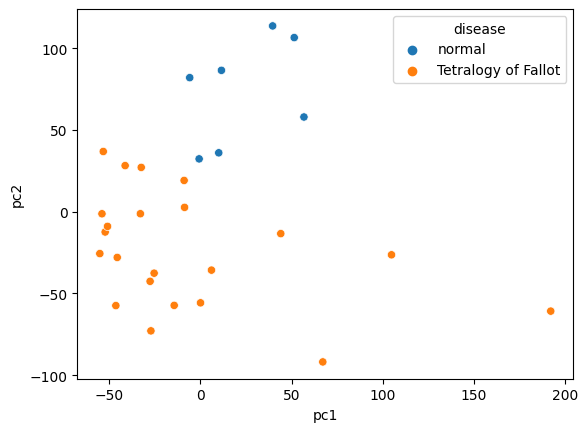

In [22]:
# Plot the results
import seaborn as sns

sns.scatterplot(df_samples, x='pc1',y='pc2', hue='disease')
plt.show()


#### **Exercise 3.4**
 We will preprocess the data in the following way:
 
- Remove the rows in the dataframe that contain "NaN" values for the column `geneCount`.
- Remove the genes that have a **total sum** gene count under 100.000





In [23]:
# 1. Removing NaN values
df.dropna(inplace=True,subset='geneCount')

# Insert missing variable here:
gene_count_threshold = 100000

# 2. Remove genes with low gene count
sel = df.groupby('Gene Name', as_index=False).sum()
sel = sel[sel.geneCount >= gene_count_threshold]['Gene Name']
df = df[df['Gene Name'].isin(sel)]
len(df)

8033

#### **Exercise 3.5**

Complete the missing parts in the following code block. The function is supposed to return the following two measures:

Complete the code after the comment blocks for:

1. Calculate the foldchange by taking the mean of `tof` and dividing it by the mean of `norm`. Store this into a new variable `fc`. *Hint: you can use the function `np.mean()` if you want to calculate the average.
2. The function `ttest_ind()` calculates the statistical difference between two conditions and returns the z-statistic and p-value. One of the conditions has already been filled in, but the other condition is missing after the comma. Fill in the missing condition after the comma.
3. Before you can store your foldchange and p-value you need to transform both as follows:
  - $log_{2} (FoldChange)$
  - $-log_{10} (P value)$

*Hint: You can use the functions `np.log2` and `np.log10` for the log transforms*

In [144]:
def p_val(x):

    # Selecting the both disease conditions
    tof = x[x.disease == 'Tetralogy of Fallot']['geneCount']
    norm = x[x.disease == 'normal']['geneCount']

    ## INSERT CODE HERE (1):
    fc = np.mean(tof) / np.mean(norm)
    
    ## INSERT CODE HERE (2):
    z, p = ttest_ind(norm, tof)

    ## INSERT CODE HERE (3):
    x['foldChange'] = np.log2(fc)
    x['pValue'] = -np.log10(p)

    # Return your new results
    return x

#### **Exercise 3.6**

Next step is to apply the function to the dataframe, we want to calculate the p-value and foldchange for every separate gene. There is a convenient function for this in pandas called `groupby()`. Next, we can apply the function to the dataframe by using the function `apply()`.
Assign the correct column name to the variable `grouping`.



In [145]:
grouping = 'Gene Name'
df = df.groupby(grouping, as_index=False).apply(lambda x: p_val(x))

#### **Exercise 3.7**

Now we come to the most fun part, plotting our results! In the following line you can see two parameters:

- `fc_b`: this depicts the cut-off value for the $log_{2}(foldchange)$. This means that you will only see the Gene names appear that are either smaller than `-fc_b` or larger than `fc_b`.
- `alpha`: The probability of incorrectly rejecting a true null hypothesis. We want our p-value to be smaller to be able to say that our two conditions are significantly different. By convention the value of 0.05 is most used for the alpha.

Play around with both parameters and run both blocks of code to see what happens.

When you have a nice collection of genes try to write a small report if the found genes make sense regarding the disease.

In [146]:
fc_b = 1.3
alpha = 0.05

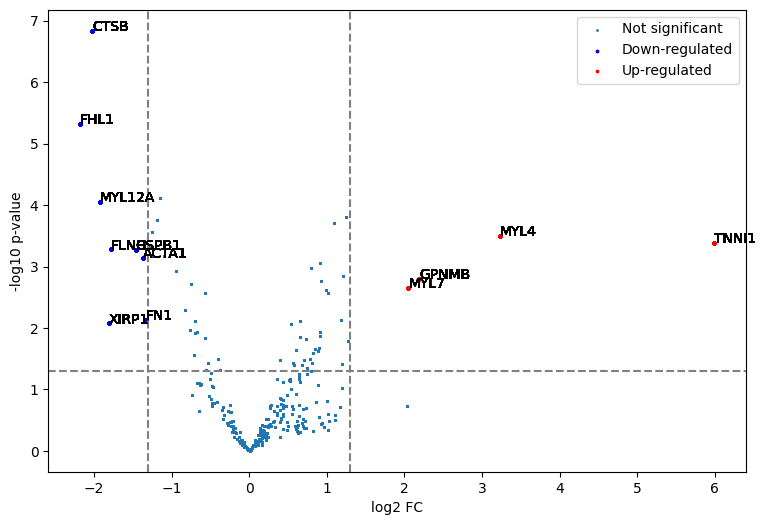

In [147]:
# Initialize figure
plt.figure(figsize=(9,6))

# log transform the alpha value
p_b = -np.log10(alpha)

# Start with plotting all points
plt.scatter(x=df['foldChange'], y=df['pValue'], s=1, label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['foldChange'] <= -fc_b) & (df['pValue'] >= p_b)]
up = df[(df['foldChange'] >= fc_b) & (df['pValue'] >= p_b)]
plt.scatter(x=down['foldChange'], y=down['pValue'],s=3, label="Down-regulated",color="blue")
plt.scatter(x=up['foldChange'], y=up['pValue'], s=3, label="Up-regulated",color="red")

# Add text to highlighted genes
for i, r in up.iterrows():
    plt.text(x=r['foldChange'], y=r['pValue'], s=r['Gene Name'])
    
for i, r in down.iterrows():
    plt.text(x=r['foldChange'], y=r['pValue'], s=r['Gene Name'])

# Plot layout
plt.xlabel("log2 FC")
plt.ylabel("-log10 p-value")
plt.axvline(-fc_b, color="grey",linestyle="--")
plt.axvline(fc_b, color="grey",linestyle="--")
plt.axhline(p_b, color="grey",linestyle="--")
plt.legend()
plt.show()

References:

1. American Heart Association. (2022). Tetralogy of Fallot. Retrieved from https://www.heart.org/en/health-topics/congenital-heart-defects/about-congenital-heart-defects/tetralogy-of-fallot
2. Centers for Disease Control and Prevention. (2022). Facts about Tetralogy of Fallot. Retrieved from https://www.cdc.gov/ncbddd/heartdefects/tetralogyoffallot.html
4. Mayo Clinic. (2022). Tetralogy of Fallot. Retrieved from https://www.mayoclinic.org/diseases-conditions/tetralogy-of-fallot/symptoms-causes/syc-20353477
4. Mocarski, M., & Bilek, L. (2021). Tetralogy of Fallot. StatPearls [Internet]. Retrieved from https://www.ncbi.nlm.nih.gov/books/NBK513263/
5. Expression Atlas (EMBI-EBI). Retrieved from https://www.ebi.ac.uk/gxa/home
6. Grunert M, Dorn C, Schueler M, Dunkel I, Schlesinger J et al. (2014) Rare and private variations in neural crest, apoptosis and sarcomere genes define the polygenic background of isolated Tetralogy of Fallot.
